<a href="https://colab.research.google.com/github/bikash086-ctrl/ML.now_GirlScript/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd'/content/drive/MyDrive/student/student'

/content/drive/MyDrive/student/student


In [3]:
ls

cleanedMathData.csv  student-mat.csv  student-por.csv     student.txt
student.gdoc         student-merge.R  student-por.gsheet


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [5]:
MathData=pd.read_csv('student-mat.csv',sep=';')

In [6]:
MathData.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [7]:
MathData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [8]:
print(f'school: {MathData.school.unique()}')
print(f'sex: {MathData.sex.unique()}')
print(f'address: {MathData.address.unique()}')
print(f'Mjob: {MathData.Mjob.unique()}')
print(f'Fjob: {MathData.Fjob.unique()}')
print(f'higher: {MathData.higher.unique()}')



school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [9]:
MathData['school']=MathData['school'].apply({'GP':1,'MS':2}.get)
MathData['sex']=MathData['sex'].apply({'F':1, 'M':2}.get)
MathData['address']=MathData['address'].apply({'U':1, 'R':2}.get)
MathData['higher']=MathData['higher'].apply({'Yes':1, 'no':2}.get)
MathData['Fjob']=MathData['Fjob'].apply({'at_home':1, 'health':2, 'services':4, 'other':3, 'teacher':5}.get)
MathData['Mjob']=MathData['Mjob'].apply({'at_home':1, 'health':2, 'services':4, 'other':3, 'teacher':5}.get)
MathData.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,NaN,no,no,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,NaN,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,LE3,T,1,1,1,3,other,mother,1,2,3,yes,no,yes,no,yes,NaN,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,yes,yes,yes,NaN,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,yes,no,yes,NaN,no,no,4,3,2,1,2,5,4,6,10,10
5,1,2,16,1,LE3,T,4,3,4,3,reputation,mother,1,2,0,no,yes,yes,yes,yes,NaN,yes,no,5,4,2,1,2,5,10,15,15,15
6,1,2,16,1,LE3,T,2,2,3,3,home,mother,1,2,0,no,no,no,no,yes,NaN,yes,no,4,4,4,1,1,3,0,12,12,11
7,1,1,17,1,GT3,A,4,4,3,5,home,mother,2,2,0,yes,yes,no,no,yes,NaN,no,no,4,1,4,1,1,1,6,6,5,6
8,1,2,15,1,LE3,A,3,2,4,3,home,mother,1,2,0,no,yes,yes,no,yes,NaN,yes,no,4,2,2,1,1,1,0,16,18,19
9,1,2,15,1,GT3,T,3,4,3,3,home,mother,1,2,0,no,yes,yes,yes,yes,NaN,yes,no,5,5,1,1,1,5,0,14,15,15


In [10]:
Mathdata=MathData[['school','sex','address','Mjob','Fjob','higher','freetime','studytime','absences','G1','G2','G3']]

In [11]:
MathData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,NaN,no,no,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,NaN,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,LE3,T,1,1,1,3,other,mother,1,2,3,yes,no,yes,no,yes,NaN,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,yes,yes,yes,NaN,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,yes,no,yes,NaN,no,no,4,3,2,1,2,5,4,6,10,10


In [12]:
MathData.to_csv('cleanedMathData.csv')

In [13]:
ls

cleanedMathData.csv  student-mat.csv  student-por.csv     student.txt
student.gdoc         student-merge.R  student-por.gsheet


In [22]:
MathData=MathData[['school','sex','address','Mjob','Fjob','higher','freetime','studytime','absences','G1','G2','G3']]

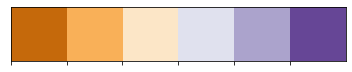

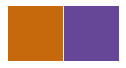

In [19]:
import seaborn as sns 
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr')
pal.as_hex()

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697']
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))


In [23]:
print(f'''There are {len(MathData.columns)} columns in the dataframe Mathdata namely,
{MathData.columns}''')

There are 12 columns in the dataframe Mathdata namely,
Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

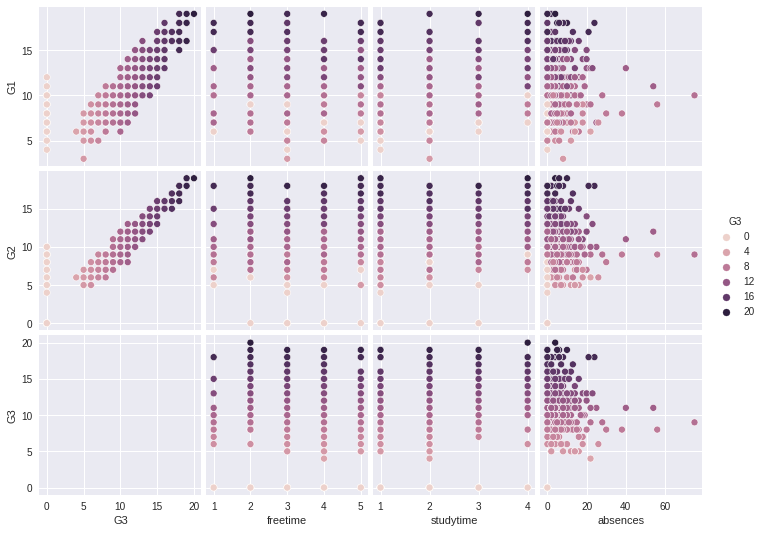

In [24]:
sns.pairplot(MathData,x_vars=['G3','freetime','studytime','absences'],y_vars=['G1','G2','G3'],diag_kind='kde',hue='G3')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

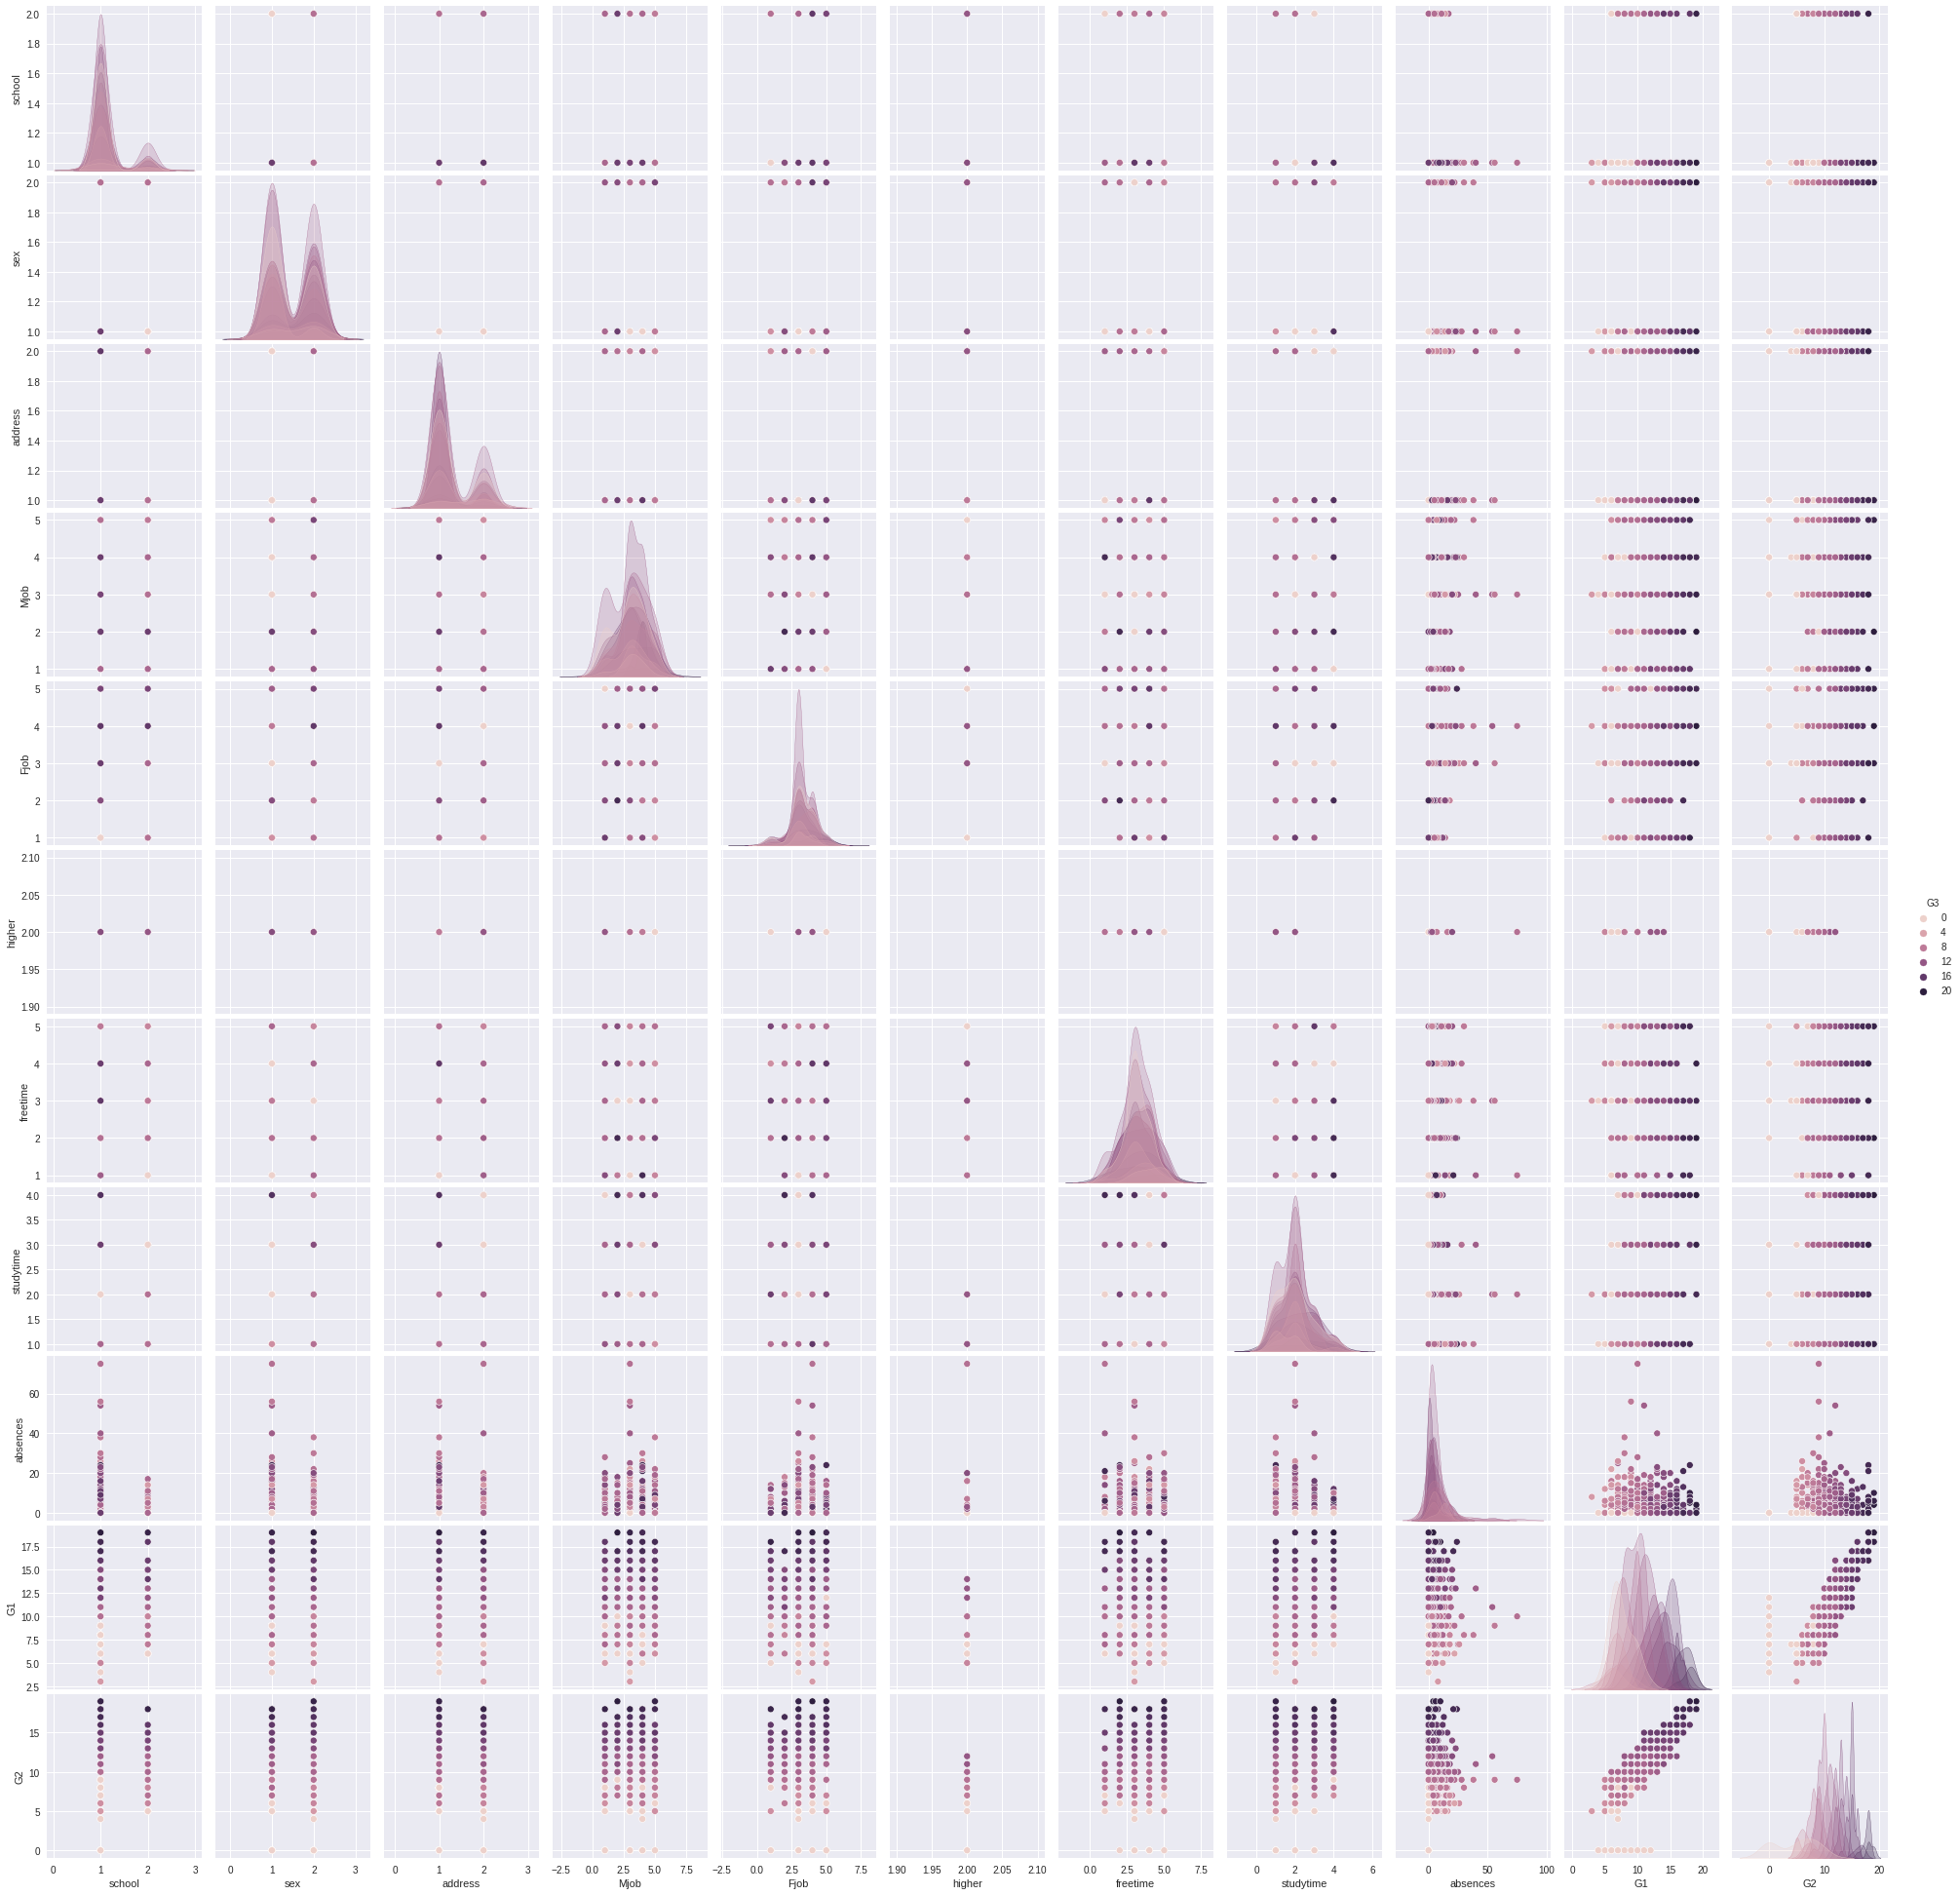

In [27]:
sns.pairplot(MathData,x_vars=['school','sex','address','Mjob','Fjob','higher','freetime','studytime','absences','G1','G2'],
             y_vars=['school','sex','address','Mjob','Fjob','higher','freetime','studytime','absences','G1','G2'],
             diag_kind='kde',hue='G3')

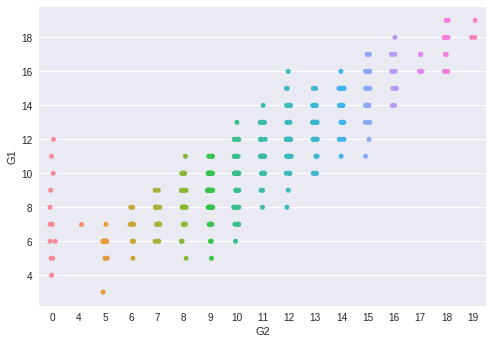

In [28]:
sns.stripplot(y='G1',x='G2',data=MathData)

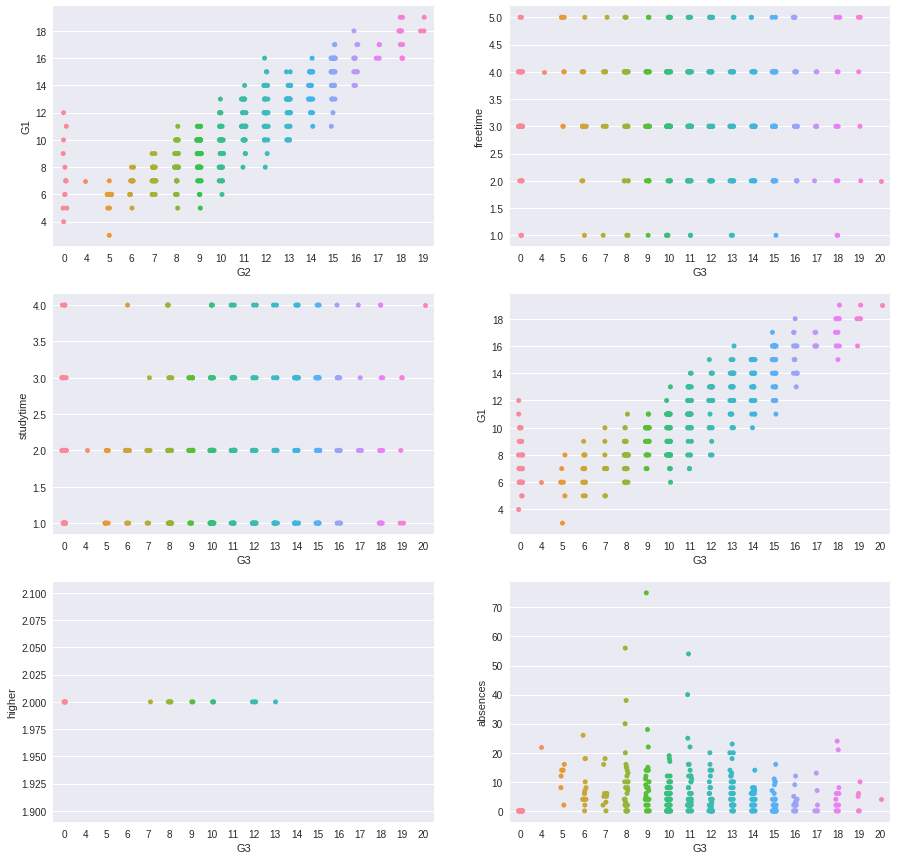

In [32]:
fig, axarr = plt.subplots(3,2, figsize=(15,15))

sns.stripplot(y='G1', x='G2', data=MathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=MathData, hue=None, ax=axarr[1][1])
sns.stripplot(y='studytime', x='G3', data=MathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=MathData, hue=None,  ax=axarr[0][1])
sns.stripplot(y='higher', x='G3', data=MathData, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=MathData, hue=None, ax=axarr[2][1])

In [34]:
trainDataset = MathData.sample(frac=0.8, random_state=0) 
testDataset = MathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        2     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    2        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    2        1     4     3  ...          2         4  11  11  11
31       1    2        1     4     4  ...          2         0  17  16  17
32       1    2        2     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [35]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 12)
(79, 12)


In [36]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        2     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    2        1     3     3  ...          2         0  14  15  15
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    2        1     4     3  ...          2         4  11  11  11
31       1    2        1     4     4  ...          2         0  17  16  17
32       1    2        2     5     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [37]:
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [38]:
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
329       1    1        1     5     5  ...         3          3         4  14  14
318       1    1        2     1     4  ...         3          3         0  11  11
317       1    1        1     3     3  ...         3          3         9   9  10
65        1    1        1     5     4  ...         4          2         2  16  15
59        1    1        1     4     3  ...         2          2         2  15  16

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
9        1    2        1     3     3  ...         5          2         0  14  15
25       1    1        1     4     4  ...         2          1        14   6   9
28       1    2        1     4     3  ...         3          2         4  11  11
31       1    2        1     4     4  ...         3          2         0  17  16
32       1    2        2     5     1  ...         5          2         0  17  16

In [39]:
print(testFeatures.shape)

(79, 11)
